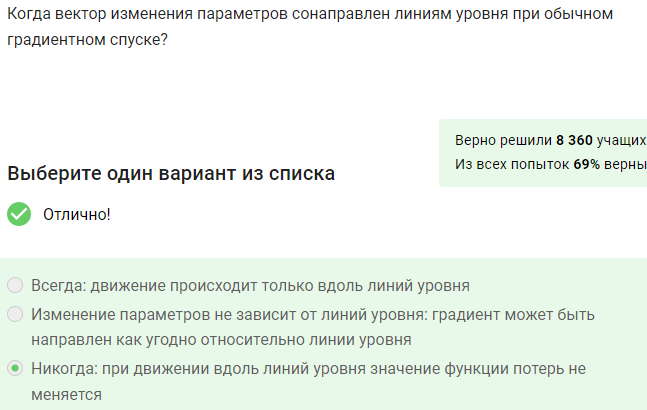

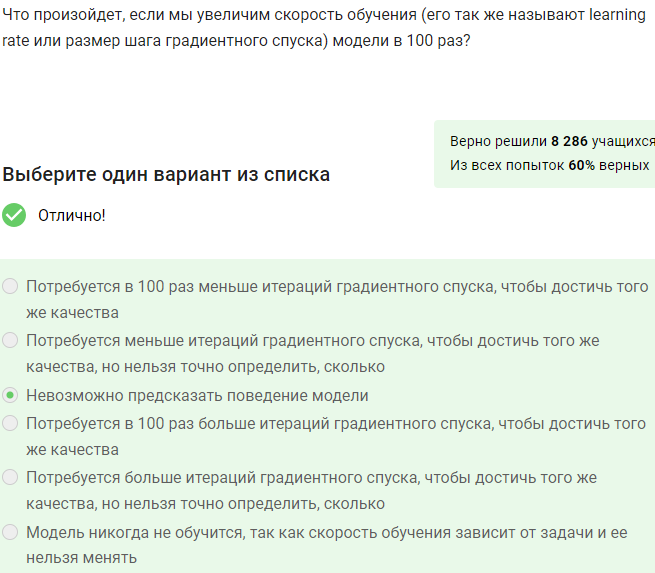

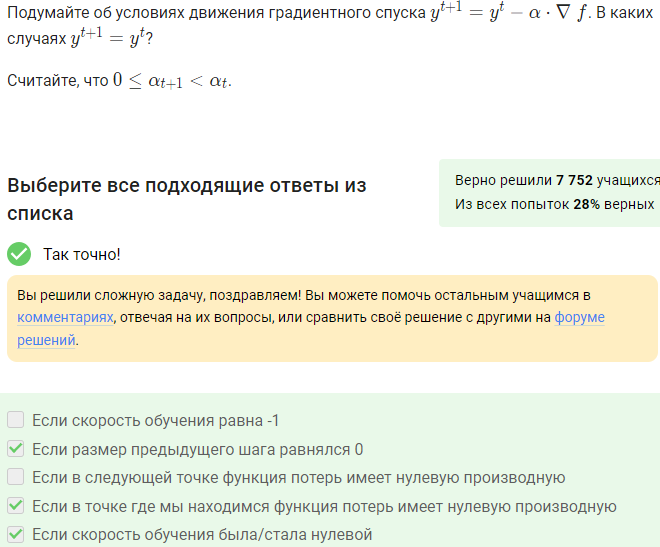

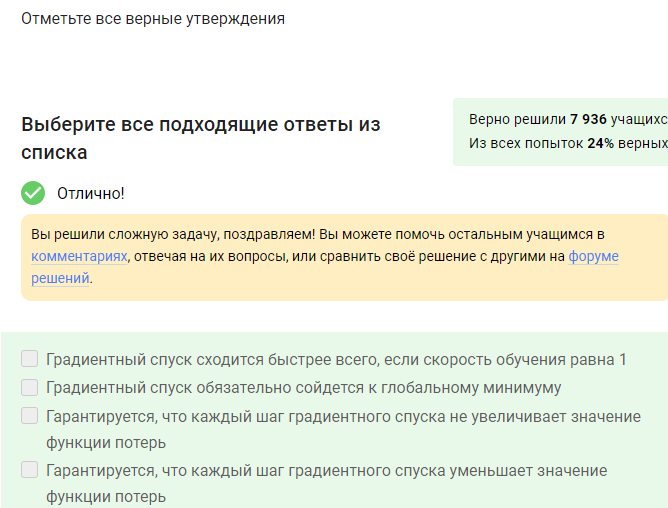

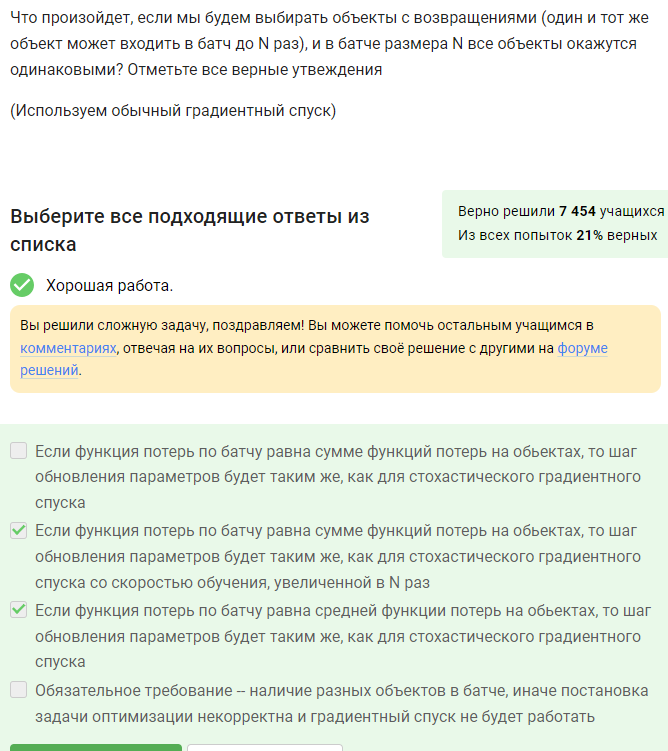

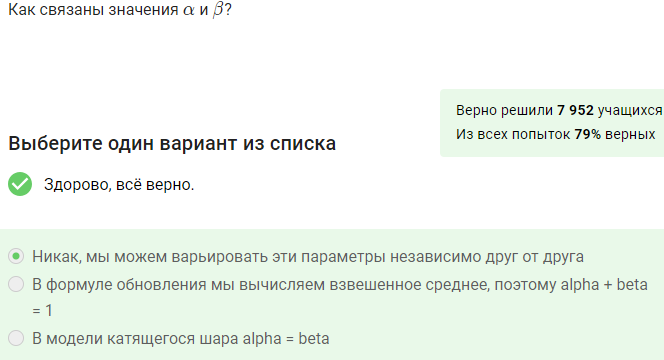

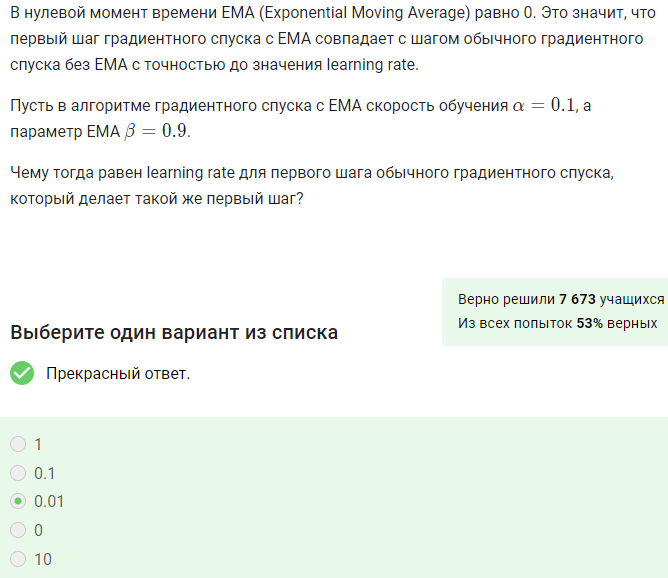

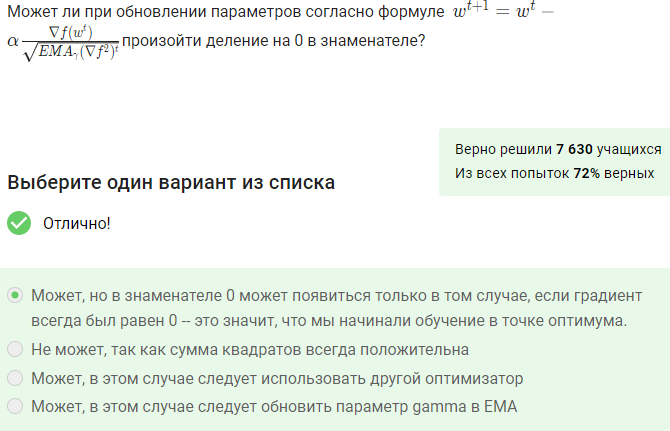

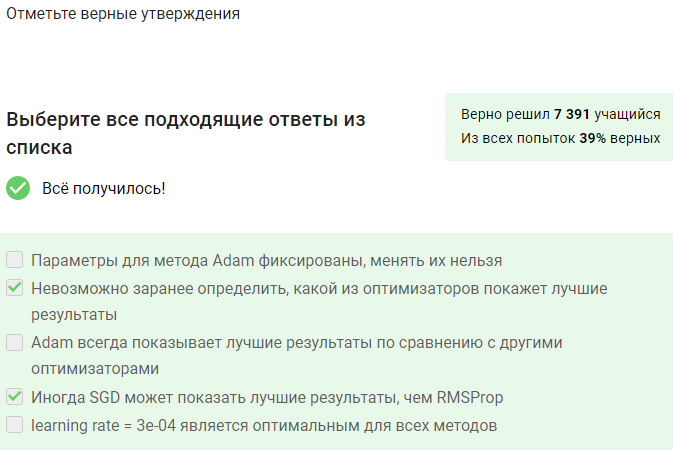

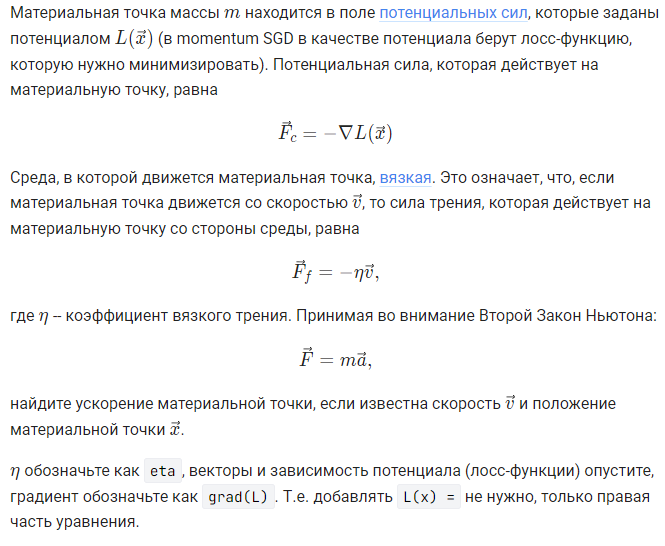

-1/m*(grad(L)+eta*v)

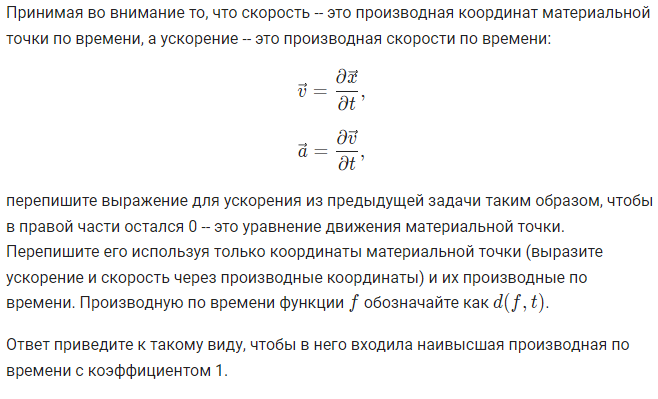

(d(d(x,t),t)*m + grad(L) + eta*d(x,t))/m

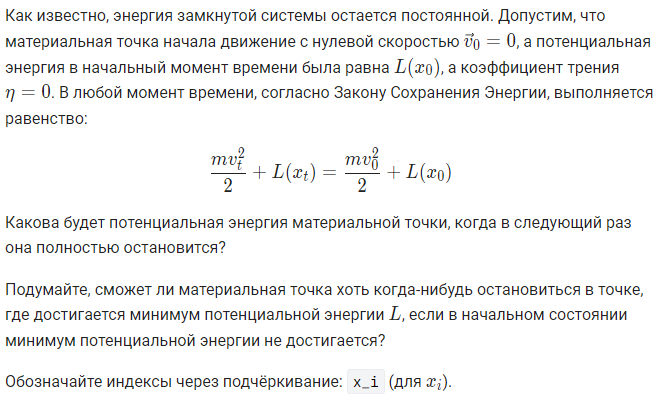

L(x_0)

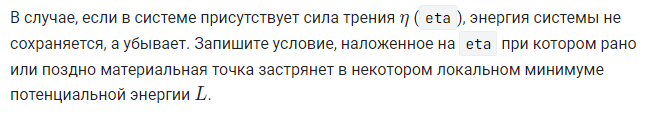

eta>0

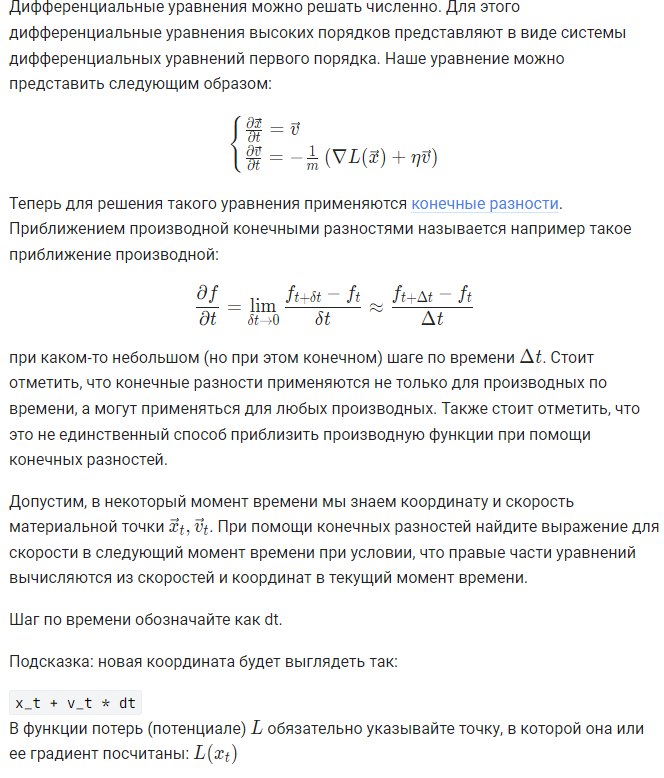

v_t + dt * (-1/m) * (grad(L(x_t)) + eta* v_t)

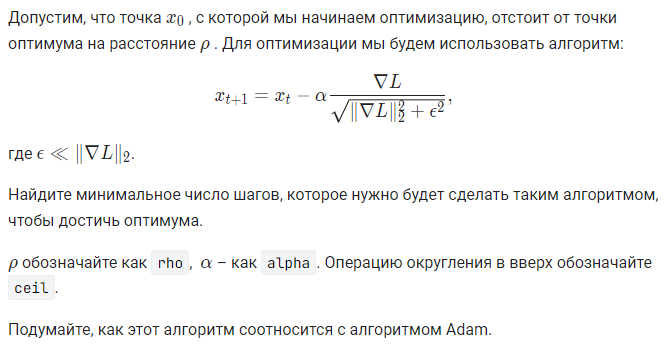

ceil(rho/alpha)

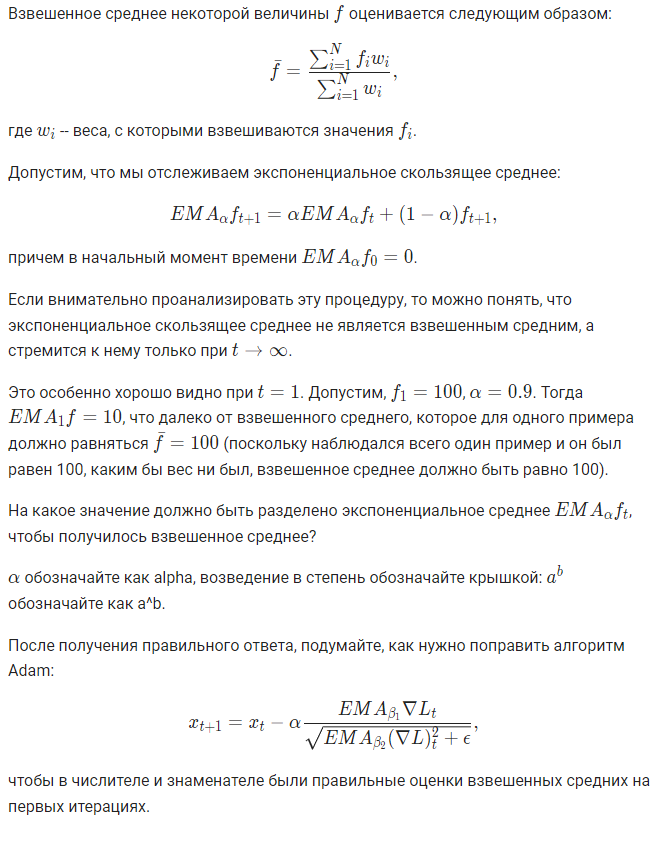

(1-alpha^t)

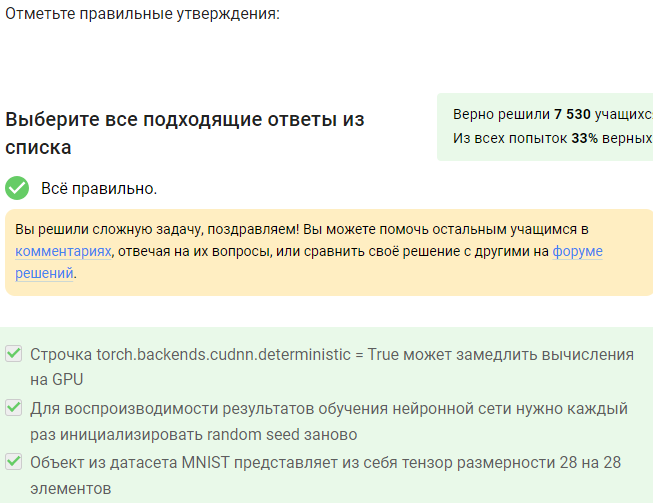

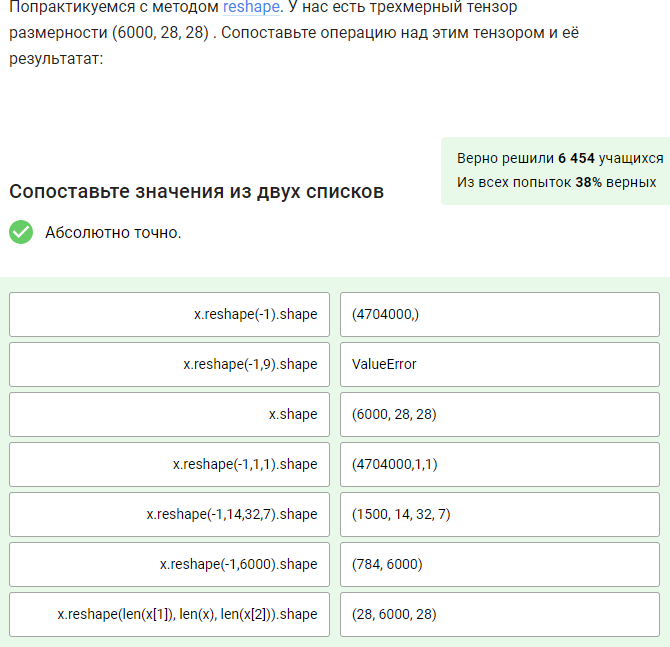

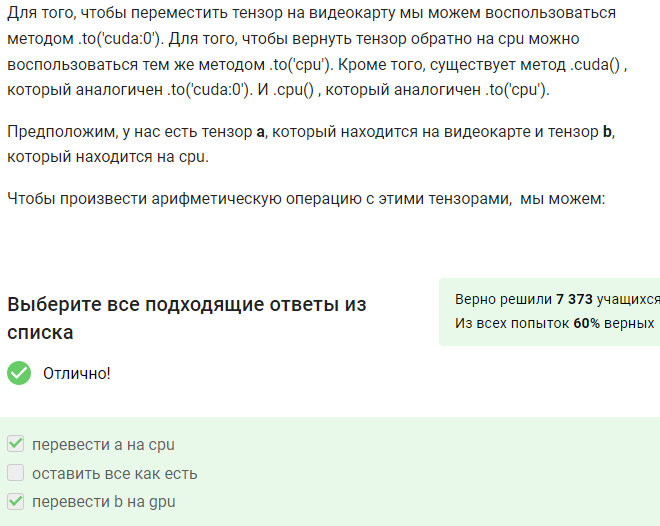

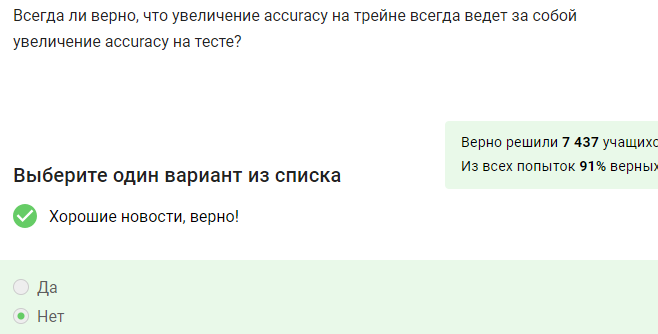

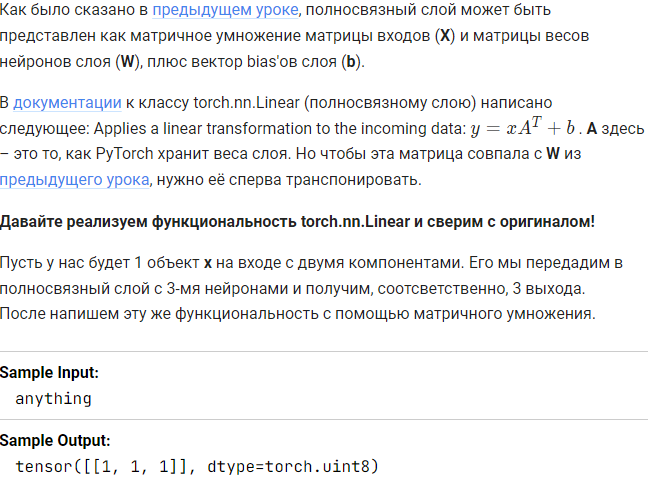

In [2]:
import torch

# Сперва создадим тензор x:
x = torch.tensor([[10., 20.]])

# Оригинальный полносвязный слой с 2-мя входами и 3-мя нейронами (выходами):
fc = torch.nn.Linear(2, 3)

# Веса fc-слоя хранятся в fc.weight, а bias'ы соответственно в fc.bias
# fc.weight и fc.bias по умолчанию инициализируются случайными числами

# Давайте проставим свои значения в веса и bias'ы:
w = torch.tensor([[11., 12.], [21., 22.], [31., 32]])
fc.weight.data = w

b = torch.tensor([[31., 32., 33.]])
fc.bias.data = b

# Получим выход fc-слоя:
fc_out = fc(x)
T = torch.tensor([1.,1.])

# Попробуем теперь получить аналогичные выходы с помощью матричного перемножения:
fc_out_alternative = x * w@T + b

# Проверка осуществляется автоматически вызовом функции
# print(fc_out == fc_out_alternative)
# (раскомментируйте, если решаете задачу локально)

ModuleNotFoundError: No module named 'torch'

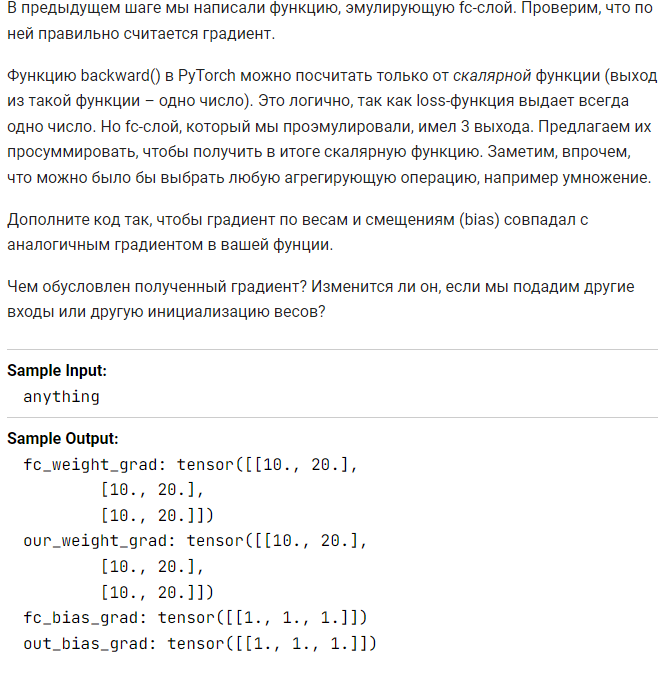

In [3]:
import torch

# Сперва создадим тензор x:
x = torch.tensor([[10., 20.]])

# Оригинальный полносвязный слой с 2-мя входами и 3-мя нейронами (выходами):
fc = torch.nn.Linear(2, 3)

# Веса fc-слоя хранятся в fc.weight, а bias'ы соответственно в fc.bias
# fc.weight и fc.bias по умолчанию инициализируются случайными числами

# Давайте проставим свои значения в веса и bias'ы:
w = torch.tensor([[11., 12.], [21., 22.], [31., 32]])
fc.weight.data = w

b = torch.tensor([[31., 32., 33.]])
fc.bias.data = b

# Получим выход fc-слоя:
fc_out = fc(x)
# Просуммируем выход fc-слоя, чтобы получить скаляр:
fc_out_summed = fc_out.sum()

# Посчитаем градиенты формулы fc_out_summed:
fc_out_summed.backward()
weight_grad = fc.weight.grad
bias_grad = fc.bias.grad

# Ok, теперь воспроизведем вычисления выше но без fc-слоя:
# Проставим, что у "w" и "b" нужно вычислять градиенты (для fc-слоя это произошло автоматически):
w.requires_grad_(True)
b.requires_grad_(True)
T = torch.tensor([1.,1.])
# Получим выход нашей формулы:
our_formula = torch.sum(x * w@T + b)

# Сделайте backward для нашей формулы:
our_formula.backward()

# Проверка осуществляется автоматически, вызовом функций:
#print('fc_weight_grad:', weight_grad)
#print('our_weight_grad:', w.grad)
#print('fc_bias_grad:', bias_grad)
#print('out_bias_grad:', b.grad)
# (раскомментируйте, если работаете над задачей локально)

ModuleNotFoundError: No module named 'torch'